### Assignment 6.2b
Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset

-- This time includes dropout and data-augmentation. 

-- Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory.

In [1]:
import json
from pathlib import Path
import os

current_dir = Path(os.getcwd()).absolute()
results_dir = current_dir.joinpath('results')

print(current_dir)
print(results_dir)

c:\Users\saman\git_repos\dsc650\dsc650\assignments\assignment06
c:\Users\saman\git_repos\dsc650\dsc650\assignments\assignment06\results


In [2]:
# loading the required libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from keras.datasets import cifar10

from keras.layers import Dropout
from keras.layers import Flatten

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


## Data
Here we are using the CIFAR10 small images dataset to classify the images.

This is a dataset of 50,000 32X32 color training images and 10,000 test images labeled over 10 categories.

In [3]:
# Data preparation is required before training the model
def load_dataset():

	# loading the CIFAR10 dataset and create the training and test arrays
	(X_train, y_train), (X_test, y_test) = cifar10.load_data()

	# Lines 1 and 2 reshapes the inputs
	X_train = X_train.reshape((X_train.shape[0], 32, 32, 3)).astype('float32')
	X_test = X_test.reshape((X_test.shape[0], 32, 32, 3)).astype('float32')

	# Lines 3 and 4
	# Normalization of the input values (image pixels) from 0 and 255 to 0.1
	X_train = X_train / 255
	X_test = X_test / 255

	# Lines 5 and 6
	# one-hot encoding of the target variables
	y_train = np_utils.to_categorical(y_train)
	y_test = np_utils.to_categorical(y_test)

	num_classes = y_test.shape[1]

	return X_train, X_test, y_train, y_test

In [8]:
# loading the CIFAR10 dataset and create the training and test arrays
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Lines 1 and 2 reshapes the inputs
X_train = X_train.reshape((X_train.shape[0], 32, 32, 3)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 32, 32, 3)).astype('float32')

# Lines 3 and 4
# Normalization of the input values (image pixels) from 0 and 255 to 0.1
X_train = X_train / 255
X_test = X_test / 255

# Lines 5 and 6
# one-hot encoding of the target variables
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]


In [9]:
# load_dataset()
print(f'Training set: {X_train.shape}')


Training set: (50000, 32, 32, 3)


In [11]:
def cnn_model_dropout():
	# function to create the CNN model
	# Create model
	model = Sequential()  # model type is sequetial
	# Stacking convolutional layers with small 3 X 3 filters
	# It is followed by a max pooling layer.
	# Each of the above blocks are repeated where the number of filters in each block is increased.
	# Also the depth of the network such as 32,64 are also increased
	# Rectified Linear Activation ReLu is most widely used. It makes the network sparse and efficient
	model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
#	model.add(Conv2D(32, (3, 3), activation='relu'))
	# Adding the pooling layer
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))

	model.add(Conv2D(64, (3, 3), activation='relu'))
#	model.add(Conv2D(64, (3, 3), activation='relu'))
	# Adding the pooling layer
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))

	model.add(Conv2D(128, (3, 3), activation='relu'))
#	model.add(Conv2D(128, (3, 3), activation='relu'))
	# Adding the pooling layer
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))

	# Flatten layer converts the 2D matrix data to a vector
	model.add(Flatten())
	# Fully connected dense layer with 128 neurons
	model.add(Dense(128, activation='relu'))
	model.add(Dropout(0.2))
	# output layer which has 10 neurons for the 10 classes
	model.add(Dense(10, activation='softmax'))


	return model


In [21]:
# Plotting the results
def summary_plot(history):

	acc = history.history['accuracy']
	val_acc = history.history['val_accuracy']
	loss = history.history['loss']
	val_loss = history.history['val_loss']

	epochs = range(1, len(acc) + 1)

	plt.plot(epochs, acc, 'bo', label='Training acc')
	plt.plot(epochs, val_acc, 'b', label='Validation acc')
	plt.title('Training and validation accuracy')
	plt.legend()

	plt.figure()

	plt.plot(epochs, loss, 'bo', label='Training loss')
	plt.plot(epochs, val_loss, 'b', label='Validation loss')
	plt.title('Training and validation loss')
	plt.legend()

	plt.show()


In [5]:
def summarize_diagnostics(history):
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	plt.savefig(f'{results_dir}\\2_plot.png')
	plt.show()
	plt.close()


In [17]:
def run_model():

	print('Load dataset')
	load_dataset()

	print('dataset loaded')
	print(f'Training set: {X_train.shape}')
	print(f'Test Set: {X_test.shape}')
	print(f'Number of categories : {num_classes}')

	print('Build model')
	# model = cnn_model()
	model = cnn_model_dropout()
	print('Model is defined')
	print('Summary of the model.')
	model.summary()

	print('Compile Model')
	model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
	print('Model compiled')

	# Create data generator
	datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')
	# prepare iterator
	it_train = datagen.flow(X_train, y_train, batch_size=64)
	steps = int(X_train.shape[0]/64)
	print('Model fitting')
	history = model.fit_generator(it_train, steps_per_epoch = steps, validation_data=(X_test, y_test), epochs=15)

	print('Saving the model')
	model.save(f'{results_dir}\\assignment_6.2b_cifar10.h5')

	print('Evaluating the model on the test data')
	scores = model.evaluate(X_test, y_test, verbose=0)

	print("CNN Accuracy: %.3f%%" % (scores[1]*100.0))

	print('Output summary')
	# summary_plot(history)
	summarize_diagnostics(history)


Load dataset
dataset loaded
Training set: (50000, 32, 32, 3)
Test Set: (10000, 32, 32, 3)
Number of categories : 10
Build model
Model is defined
Summary of the model.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_12 (Dropout

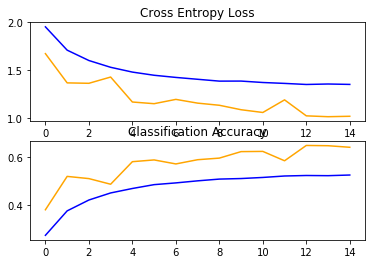

In [18]:
run_model()